# Corona Virus outbreak Prediction

## About COVID-19


The coronavirus (COVID-19) pandemic had spread across 190 countries infecting 4.2 lakh people and killing 16,500 so far. In India, as many as 562 COVID-19 cases have been reported so far. Of these, 37 have recovered and 10 have died.

On March 24, Prime Minister annouced that the country would go under 21-day lockdown to combat the spread of the virus. Infections were rapidly rising in Italy, France, Germany, Spain, United Kingdom and the United States. It has has a massive impact on the global economy.

The outbreak of COVID-19 is developing into a major international crisis, and it's started to influence important aspects of daily life. For example in India:

Travel: Complete lockdown, no domestic or international flights were allowed in India during pandemic.
Grocery stores: In highly affected areas, people started to stock up essential goods leading to shortage of essential stuffs.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Disable warnings 
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_excel('Covid cases in India.xlsx')
df

,S. No.,Name of State / UT,Total Confirmed cases (Indian National),Total Confirmed cases ( Foreign National ),Cured,Death
0,1,Andhra Pradesh,9,0,0,0
1,2,Bihar,3,0,0,1
2,3,Chhattisgarh,1,0,0,0
3,4,Delhi,30,1,6,1
4,5,Gujarat,32,1,0,1
5,6,Haryana,14,14,11,0
6,7,Himachal Pradesh,3,0,0,1
7,8,Karnataka,41,0,3,1
8,9,Kerala,101,8,4,0
9,10,Madhya Pradesh,9,0,0,0


### Visualization Inference:

- Manipur and Mizoram reports thier first case.
- Kerela has crossed Maharashtra in terms of highest number of confirmed cases.
- Haryana and Telengana has the highest count of confirmed Foreign National count.
- Till 25th of March 9 people have died in India
- Kerala, Maharashtra, and karnataka are currently TOP 3 states with maximum number of confirmed cases

## Dropping unnecessary column

In [3]:
df.drop(['S. No.'],axis=1,inplace=True)

## Total no. of cases

In [4]:
#Total case is the total number of confirmed cases (Indian National + Foreign National)

df['Total cases'] = df['Total Confirmed cases (Indian National)'] + df['Total Confirmed cases ( Foreign National )']
total_cases = df['Total cases'].sum()
total_cases

562

Observation :- Total number of confirmed COVID 2019 cases across India till date (22nd March, 2020): 562

## Total Active cases

In [5]:
df['Total Active'] = df['Total cases'] - (df['Death'] + df['Cured'])
total_active = df['Total Active'].sum()
total_active

512

In [6]:
Total_Cases = df.groupby('Name of State / UT')['Total Active'].sum().sort_values(ascending=False).to_frame()
Total_Cases.style.background_gradient(cmap='Reds')

,Total Active
Name of State / UT,
Kerala,105
Maharashtra,99
Karnataka,37
Telengana,34
Gujarat,32
Rajasthan,29
Punjab,28
Uttar Pradesh,24
Delhi,24


Observation :- Above we see that the highest no. of active cases 105 and 99 were from the state Kerala & Maharashtra respectively.

# Confirmed vs Recovered Cases

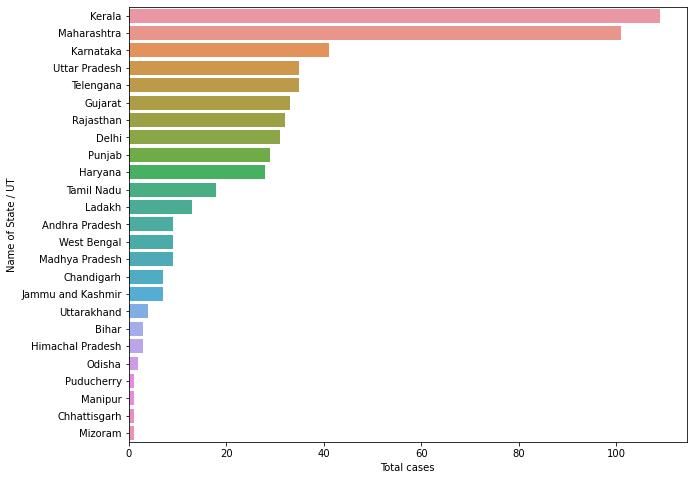

In [7]:
plt.figure(figsize=(10,8))
df.sort_values('Total cases',ascending=False,inplace=True)
sns.barplot(x="Total cases", y="Name of State / UT", data=df,label="Total")
plt.show()

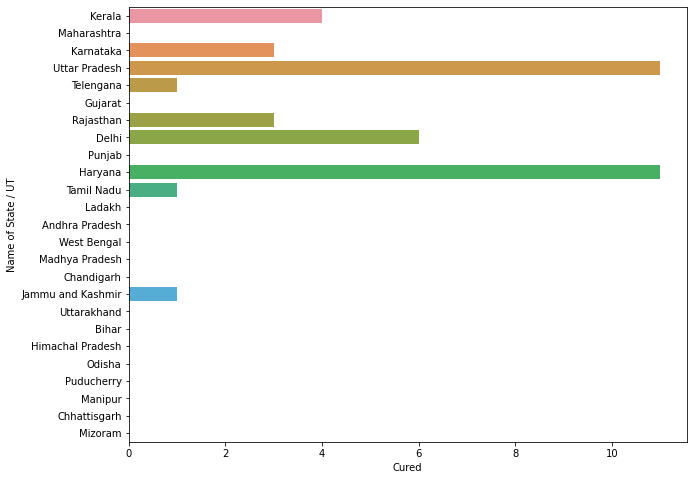

In [8]:
plt.figure(figsize=(10,8))
sns.barplot(x="Cured", y="Name of State / UT", data=df, label="Cured")
plt.show()

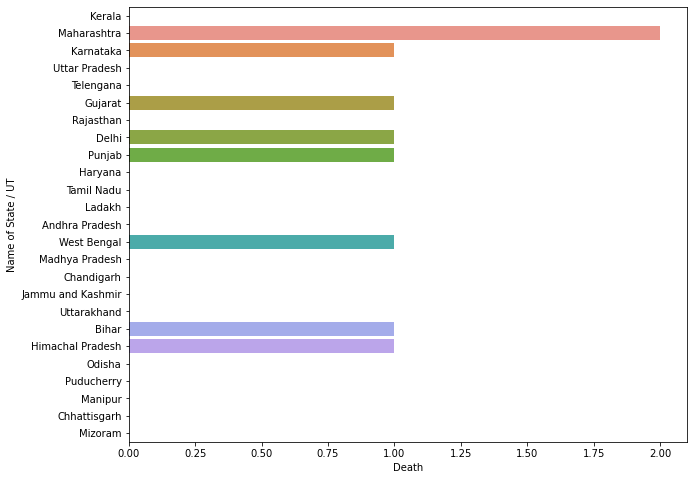

In [9]:
plt.figure(figsize=(10,8))
sns.barplot(x="Death", y="Name of State / UT", data=df, label="Death")
plt.show()

Observation :- We saw that Karnataka and Haryana were the states with more cured patients.

# Exploring world wide data

### First we read our all the datasets

In [10]:
df1 = pd.read_csv('covid_19_clean_complete.csv')
df1

,Province/State,Country/Region,Lat,Long,Date,Confirmed,Deaths,Recovered
0,NaN,Thailand,15.0000,101.0000,1/22/20,2.0,0.0,0.0
1,NaN,Japan,36.0000,138.0000,1/22/20,2.0,0.0,0.0
2,NaN,Singapore,1.2833,103.8333,1/22/20,0.0,0.0,0.0
3,NaN,Nepal,28.1667,84.2500,1/22/20,0.0,0.0,0.0
4,NaN,Malaysia,2.5000,112.5000,1/22/20,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...
19215,NaN,Jersey,49.1900,-2.1100,3/23/20,0.0,0.0,0.0
19216,NaN,Puerto Rico,18.2000,-66.5000,3/23/20,0.0,1.0,0.0
19217,NaN,Republic of the Congo,-1.4400,15.5560,3/23/20,0.0,0.0,0.0
19218,NaN,The Bahamas,24.2500,-76.0000,3/23/20,0.0,0.0,0.0


### Dropping not required column

In [11]:
df1.drop(['Province/State'],axis=1,inplace=True)

In [12]:
df2_confirmed = pd.read_csv("time_series_covid19_confirmed_global.csv")
df3_recovered = pd.read_csv("time_series_covid19_recovered_global.csv")
df4_deaths = pd.read_csv("time_series_covid19_deaths_global.csv")

In [13]:
df2_confirmed.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,16,21,22,22,22,24,24,40,40,74
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,42,51,55,59,64,70,76,89,104,123
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,48,54,60,74,87,90,139,201,230,264
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,1,2,39,39,53,75,88,113,133,164
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,1,2,2,3,3


In [14]:
df3_recovered.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20
0,NaN,Thailand,15.0000,101.0000,0,0,0,0,2,2,...,35,35,35,41,42,42,42,42,44,44.0
1,NaN,Japan,36.0000,138.0000,0,0,0,0,1,1,...,118,118,144,144,144,150,191,232,235,235.0
2,NaN,Singapore,1.2833,103.8333,0,0,0,0,0,0,...,105,105,109,114,114,114,124,140,144,144.0
3,NaN,Nepal,28.1667,84.2500,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,NaN,Malaysia,2.5000,112.5000,0,0,0,0,0,0,...,35,42,42,49,60,75,87,114,139,139.0


In [15]:
df4_deaths.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20,3/21/20,3/22/20,3/23/20,3/24/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,1,1,1,2,2,2,2,2,4,5
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,4,4,4,7,9,11,15,17,17,19
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
#Overall worldwide Confirmed/ Deaths/ Recovered cases 
df1.groupby('Date').sum()

,Lat,Long,Confirmed,Deaths,Recovered
Date,,,,,
1/22/20,7777.4793,1639.7021,554.0,17.0,28.0
1/23/20,7777.4793,1639.7021,652.0,18.0,30.0
1/24/20,7777.4793,1639.7021,939.0,26.0,36.0
1/25/20,7777.4793,1639.7021,1432.0,42.0,39.0
1/26/20,7777.4793,1639.7021,2113.0,56.0,52.0
...,...,...,...,...,...
3/5/20,7777.4793,1639.7021,97710.0,3336.0,53789.0
3/6/20,7777.4793,1639.7021,101567.0,3446.0,55858.0
3/7/20,7777.4793,1639.7021,105485.0,3541.0,58351.0


## Date wise confirmed cases, deaths, recovered cases

In [17]:
confirmed = df1.groupby('Date').sum()['Confirmed'].reset_index()
deaths = df1.groupby('Date').sum()['Deaths'].reset_index()
recovered = df1.groupby('Date').sum()['Recovered'].reset_index()

In [18]:
confirmed

,Date,Confirmed
0,1/22/20,554.0
1,1/23/20,652.0
2,1/24/20,939.0
3,1/25/20,1432.0
4,1/26/20,2113.0
...,...,...
57,3/5/20,97710.0
58,3/6/20,101567.0
59,3/7/20,105485.0
60,3/8/20,109343.0


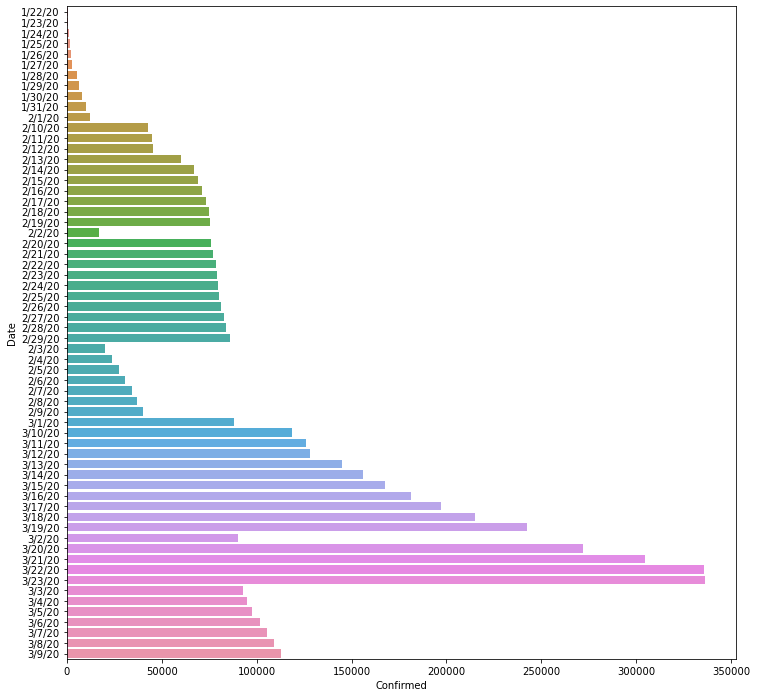

In [19]:
plt.figure(figsize=(12,12))
sns.barplot(x="Confirmed", y="Date", data=confirmed)
plt.show()

In [20]:
deaths

,Date,Deaths
0,1/22/20,17.0
1,1/23/20,18.0
2,1/24/20,26.0
3,1/25/20,42.0
4,1/26/20,56.0
...,...,...
57,3/5/20,3336.0
58,3/6/20,3446.0
59,3/7/20,3541.0
60,3/8/20,3781.0


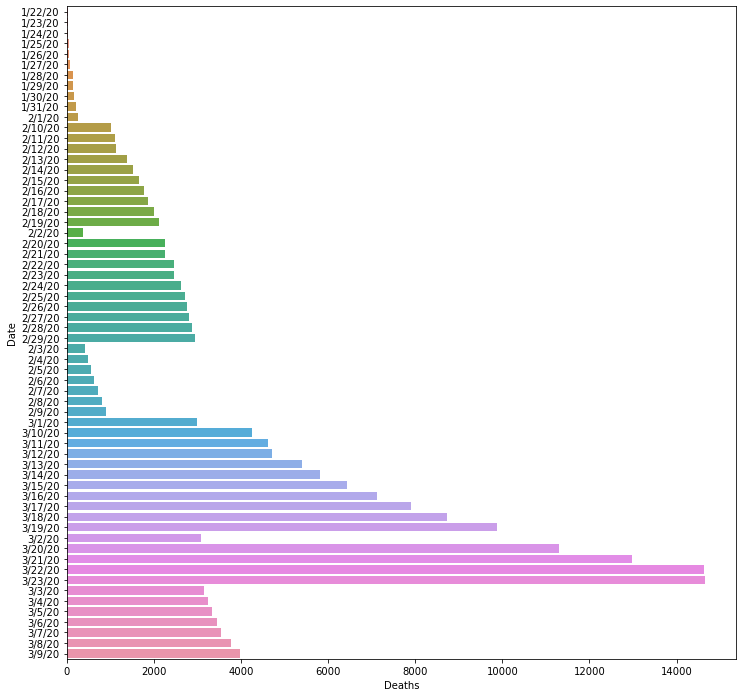

In [21]:
plt.figure(figsize=(12,12))
sns.barplot(x="Deaths", y="Date", data=deaths)
plt.show()

In [22]:
recovered

,Date,Recovered
0,1/22/20,28.0
1,1/23/20,30.0
2,1/24/20,36.0
3,1/25/20,39.0
4,1/26/20,52.0
...,...,...
57,3/5/20,53789.0
58,3/6/20,55858.0
59,3/7/20,58351.0
60,3/8/20,60687.0


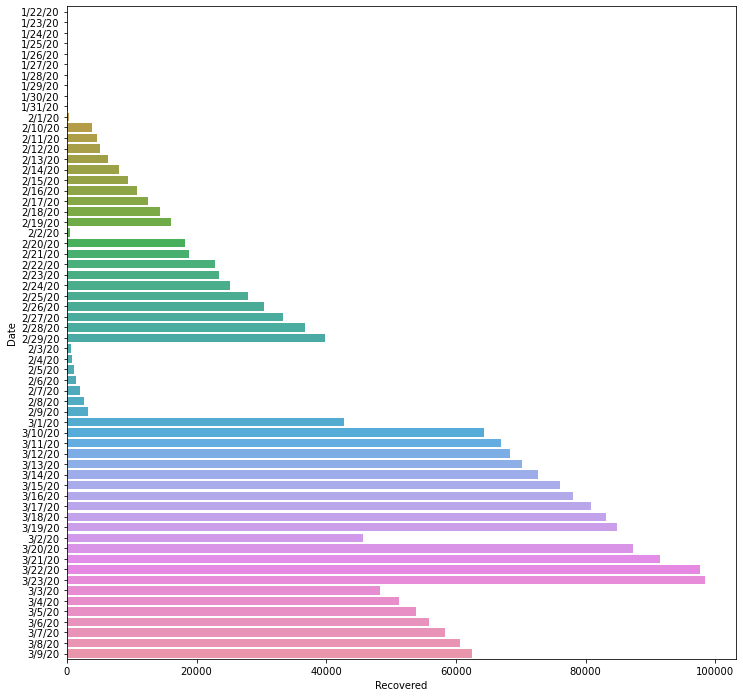

In [23]:
plt.figure(figsize=(12,12))
sns.barplot(x="Recovered", y="Date", data=recovered)
plt.show()

## Now exploring on new dataset 

In [24]:
covid = pd.read_csv('covid.csv')
covid.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


In [25]:
covid.isnull().sum()

iso_code                              64
location                               0
date                                   0
total_cases                            0
new_cases                              0
total_deaths                           0
new_deaths                             0
total_cases_per_million              377
new_cases_per_million                377
total_deaths_per_million             377
new_deaths_per_million               377
total_tests                        14332
new_tests                          14904
total_tests_per_thousand           14332
new_tests_per_thousand             14904
new_tests_smoothed                 13866
new_tests_smoothed_per_thousand    13866
tests_units                        13267
stringency_index                    4500
population                            64
population_density                   850
median_age                          1743
aged_65_older                       1980
aged_70_older                       1832
gdp_per_capita  

In [26]:
covid_data = covid.groupby('date').sum()
covid_data

,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,new_deaths_per_million,total_tests,new_tests,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
date,,,,,,,,,,,,,,,,,,,,,
2019-12-31,54,54,0,0,0.022,0.022,0.000,0.000,0.0,0.0,...,774.066,510.351,2070610.055,103.8,14482.774,518.88,773.934,1992.435,1458.669,240.887
2020-01-01,54,0,0,0,0.022,0.000,0.000,0.000,5.0,5.0,...,774.066,510.351,2070610.055,103.8,14482.774,518.88,773.934,1992.435,1458.669,240.887
2020-01-02,54,0,0,0,0.022,0.000,0.000,0.000,21.0,16.0,...,774.066,510.351,2070610.055,103.8,14482.774,518.88,773.934,1992.435,1458.669,240.887
2020-01-03,88,34,0,0,0.037,0.014,0.000,0.000,39.0,18.0,...,774.066,510.351,2070610.055,103.8,14482.774,518.88,773.934,1992.435,1458.669,240.887
2020-01-04,88,0,0,0,0.037,0.000,0.000,0.000,45.0,6.0,...,774.066,510.351,2070610.055,103.8,14482.774,518.88,773.934,1992.435,1458.669,240.887
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-05-20,9723252,190150,646305,10456,239471.498,3509.804,10844.597,93.183,45304069.0,1273008.0,...,1611.721,1024.790,3515540.422,1686.7,47624.899,1556.39,1468.234,4536.435,4632.128,496.783
2020-05-21,9922218,198966,655905,9600,243107.500,3635.999,10934.088,89.495,37590504.0,1097657.0,...,1611.721,1024.790,3515540.422,1686.7,47624.899,1556.39,1468.234,4536.435,4632.128,496.783
2020-05-22,10138036,215818,666791,10886,246641.813,3534.317,11024.188,90.095,46051228.0,1197699.0,...,1611.721,1024.790,3515540.422,1686.7,47624.899,1556.39,1468.234,4536.435,4632.128,496.783


In [27]:
covid_data.isnull().sum()

total_cases                        0
new_cases                          0
total_deaths                       0
new_deaths                         0
total_cases_per_million            0
new_cases_per_million              0
total_deaths_per_million           0
new_deaths_per_million             0
total_tests                        0
new_tests                          0
total_tests_per_thousand           0
new_tests_per_thousand             0
new_tests_smoothed                 0
new_tests_smoothed_per_thousand    0
stringency_index                   0
population                         0
population_density                 0
median_age                         0
aged_65_older                      0
aged_70_older                      0
gdp_per_capita                     0
extreme_poverty                    0
cvd_death_rate                     0
diabetes_prevalence                0
female_smokers                     0
male_smokers                       0
handwashing_facilities             0
h

In [28]:
covid_data.nunique()

total_cases                        134
new_cases                          133
total_deaths                       128
new_deaths                         114
total_cases_per_million            134
new_cases_per_million              132
total_deaths_per_million           127
new_deaths_per_million             122
total_tests                        146
new_tests                          141
total_tests_per_thousand           126
new_tests_per_thousand             113
new_tests_smoothed                 130
new_tests_smoothed_per_thousand    111
stringency_index                   130
population                          48
population_density                  44
median_age                          46
aged_65_older                       45
aged_70_older                       45
gdp_per_capita                      45
extreme_poverty                     38
cvd_death_rate                      43
diabetes_prevalence                 45
female_smokers                      36
male_smokers             

In [29]:
covid_data.dtypes

total_cases                          int64
new_cases                            int64
total_deaths                         int64
new_deaths                           int64
total_cases_per_million            float64
new_cases_per_million              float64
total_deaths_per_million           float64
new_deaths_per_million             float64
total_tests                        float64
new_tests                          float64
total_tests_per_thousand           float64
new_tests_per_thousand             float64
new_tests_smoothed                 float64
new_tests_smoothed_per_thousand    float64
stringency_index                   float64
population                         float64
population_density                 float64
median_age                         float64
aged_65_older                      float64
aged_70_older                      float64
gdp_per_capita                     float64
extreme_poverty                    float64
cvd_death_rate                     float64
diabetes_pr

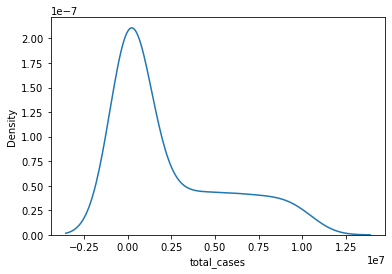

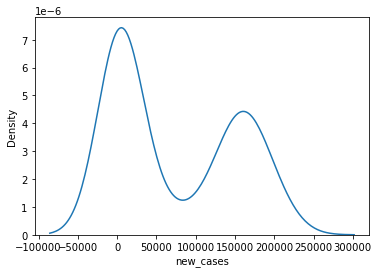

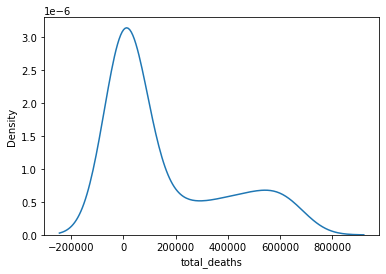

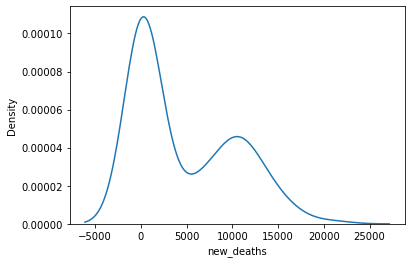

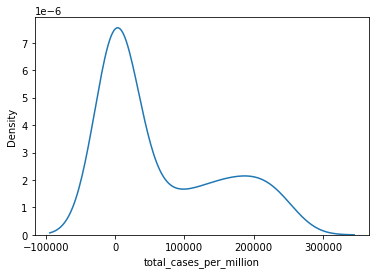

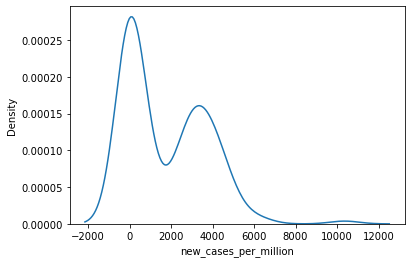

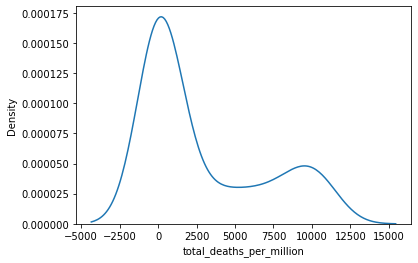

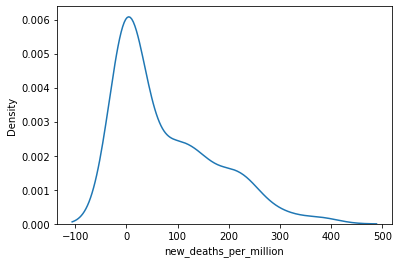

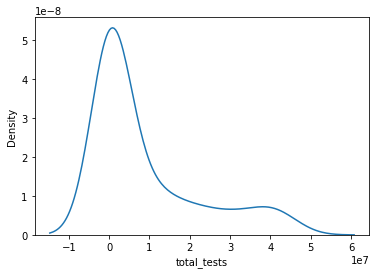

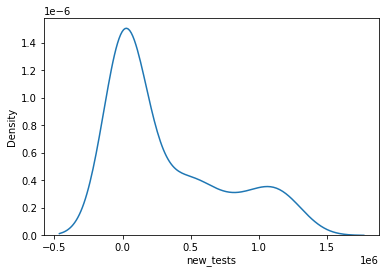

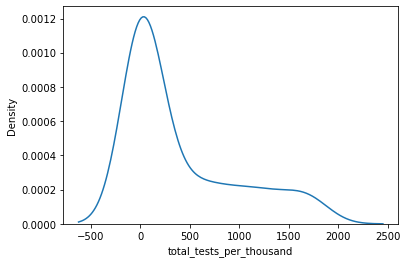

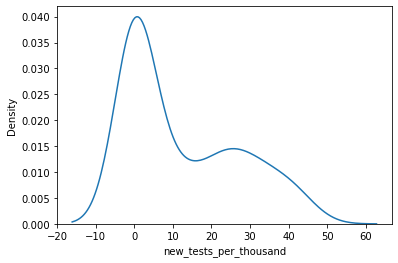

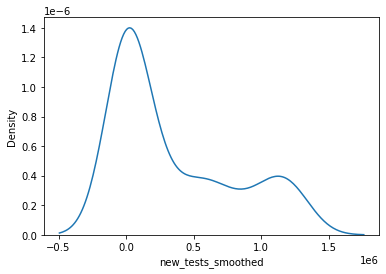

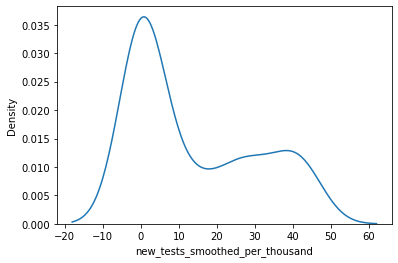

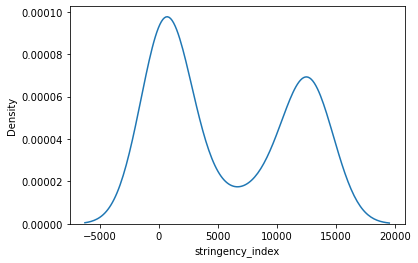

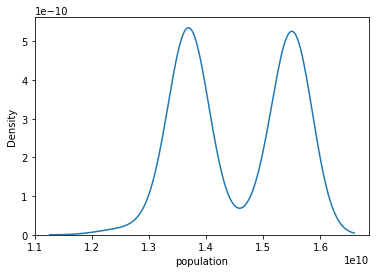

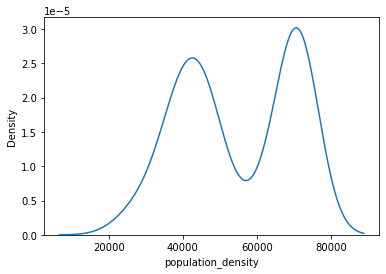

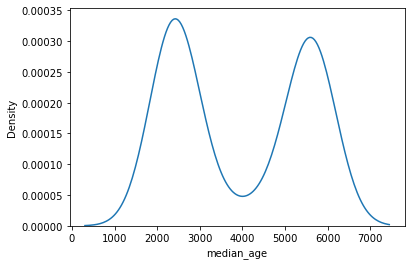

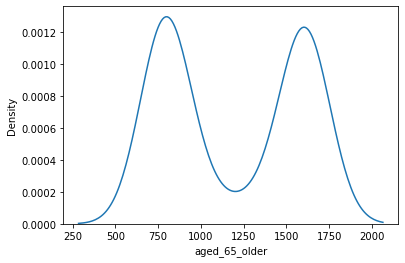

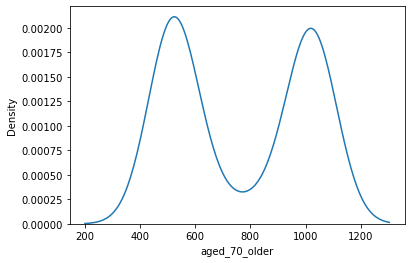

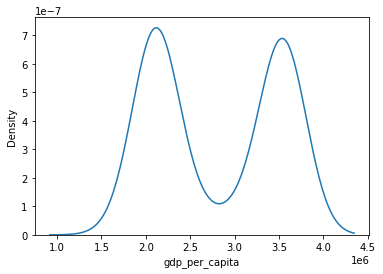

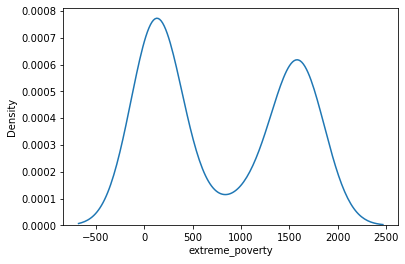

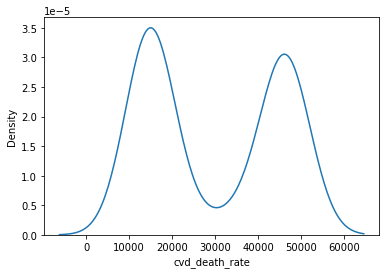

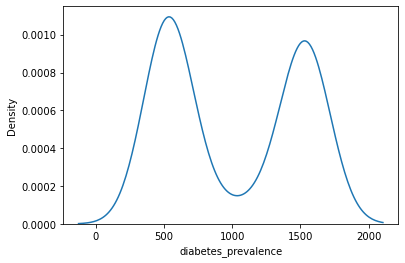

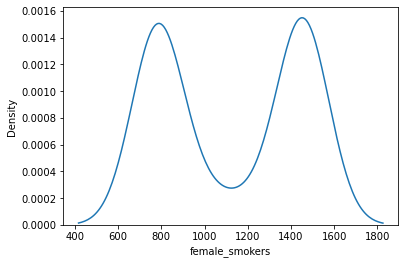

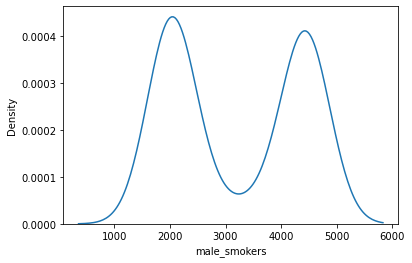

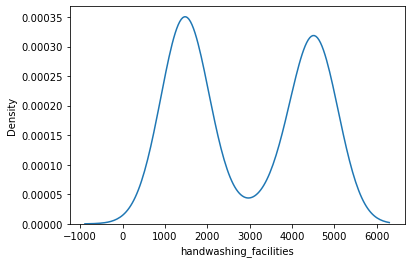

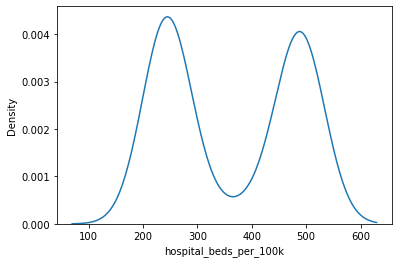

In [30]:
for i in covid_data.columns:
    sns.kdeplot(data=covid_data,x=i)
    plt.show()

## Now plotting boxplot for checking outliers

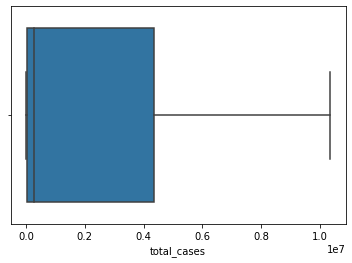

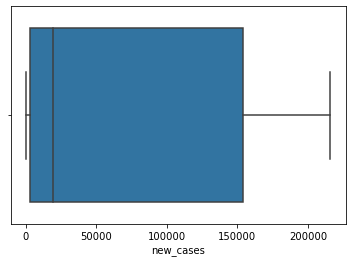

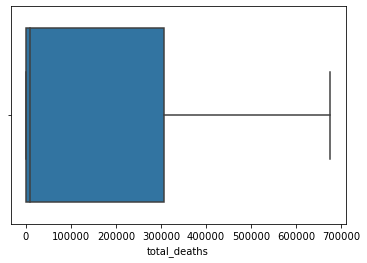

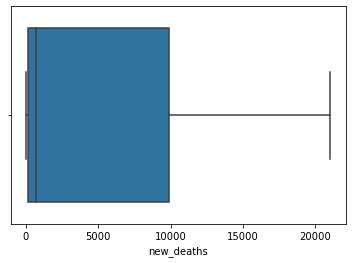

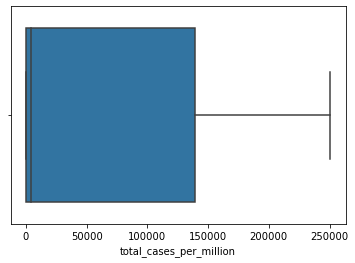

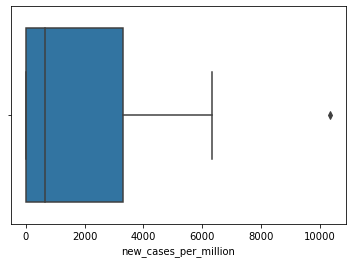

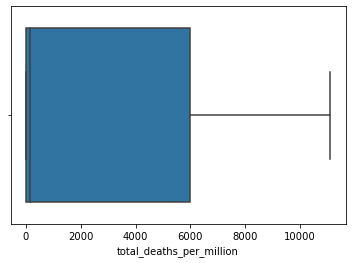

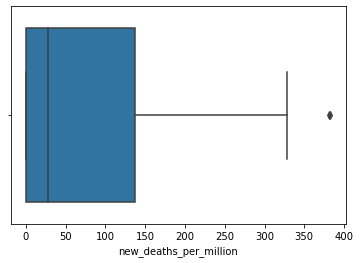

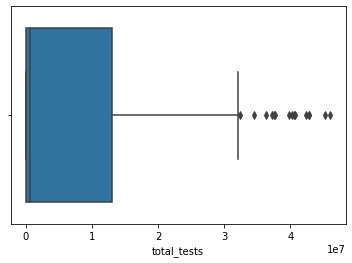

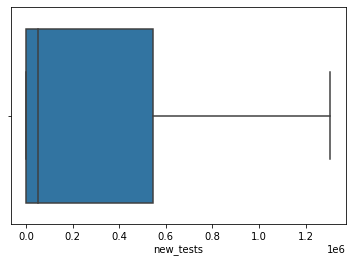

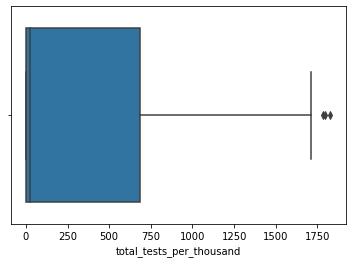

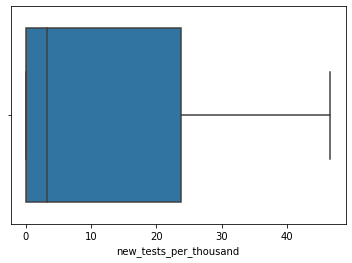

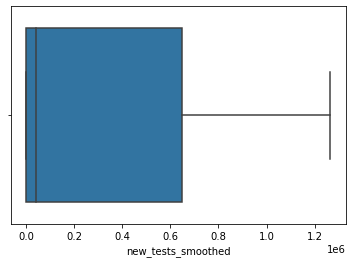

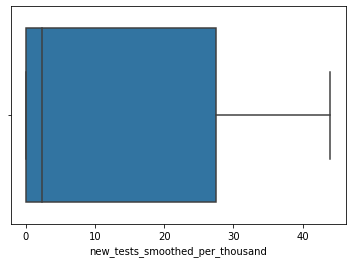

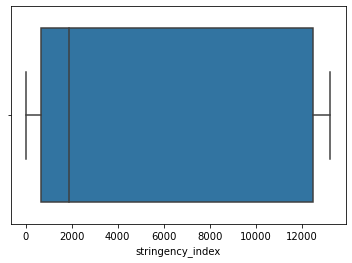

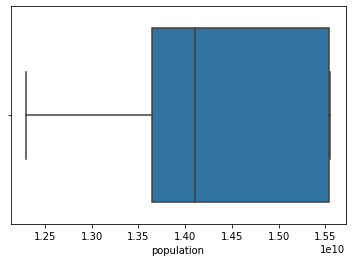

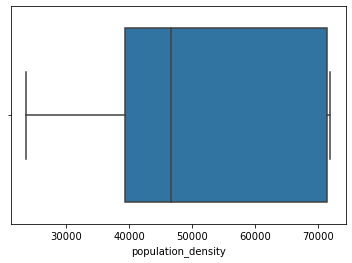

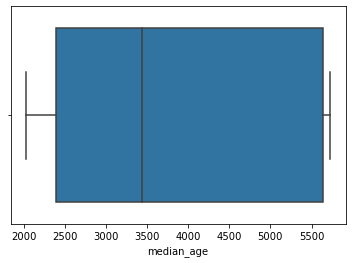

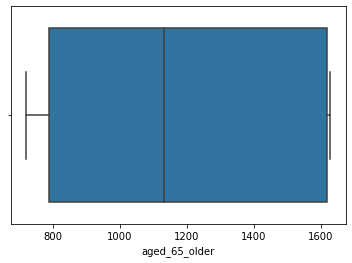

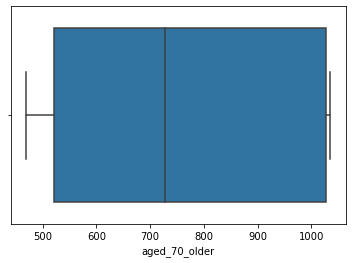

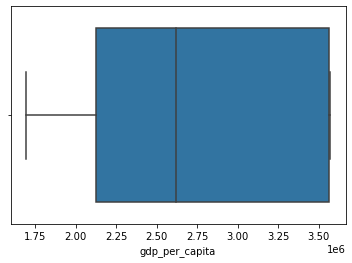

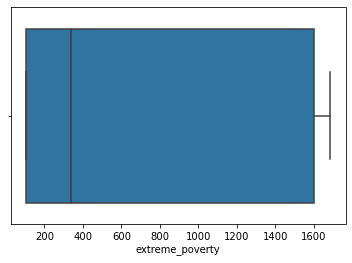

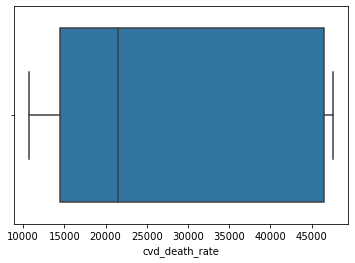

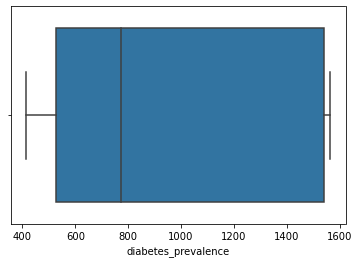

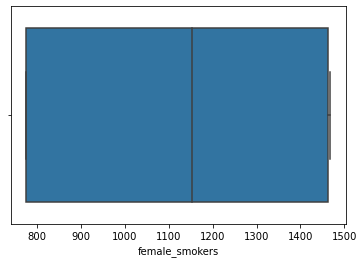

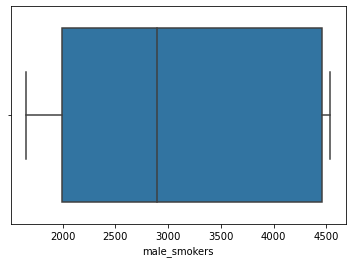

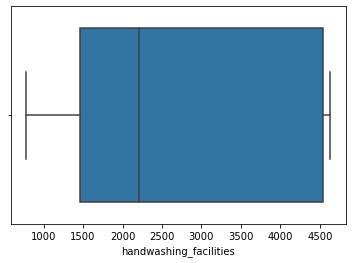

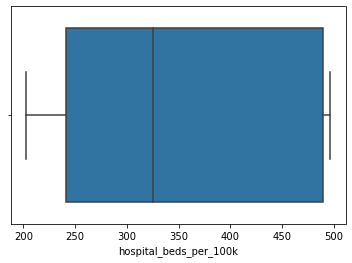

In [31]:
for i in covid_data.columns:
    sns.boxplot(data=covid_data,x=i)
    plt.show()

We observe that from the above that in our dataset we don't have any outliers present and all are in symmetric distribution.

## Target variable Distribution

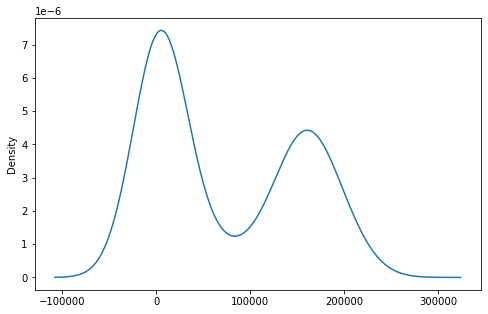

In [32]:
plt.figure(figsize=(8,5))
covid_data['new_cases'].plot(kind='kde')
plt.show()

# Splitting data into independent and dependent variable

In [33]:
X=covid_data.drop('new_cases',axis=1).values
X

array([[5.4000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.9924350e+03,
        1.4586690e+03, 2.4088700e+02],
       [5.4000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.9924350e+03,
        1.4586690e+03, 2.4088700e+02],
       [5.4000000e+01, 0.0000000e+00, 0.0000000e+00, ..., 1.9924350e+03,
        1.4586690e+03, 2.4088700e+02],
       ...,
       [1.0138036e+07, 6.6679100e+05, 1.0886000e+04, ..., 4.5364350e+03,
        4.6321280e+03, 4.9678300e+02],
       [1.0351176e+07, 6.7617100e+05, 9.3800000e+03, ..., 4.5364350e+03,
        4.6321280e+03, 4.9678300e+02],
       [1.0053885e+07, 6.1835300e+05, 7.2660000e+03, ..., 4.4556350e+03,
        4.6321280e+03, 4.8727300e+02]])

In [34]:
y=covid_data['new_cases'].values
y

array([    54,      0,      0,     34,      0,     30,      0,      0,
            0,      0,      0,      0,      0,      2,      0,      2,
            0,     10,     34,    272,     40,    306,    284,    194,
          532,    906,   1346,   1594,   3534,   2960,   3512,   4006,
         4240,   5216,   5636,   6486,   7814,   7502,   6436,   6884,
         5238,   5976,   5130,   4144,  30302,   8430,   5120,   4324,
         4134,   3990,   3728,   1064,   1992,   2170,   2016,   1054,
         1586,   1730,   2218,   2538,   3696,   3638,   4158,   3644,
         4500,   4542,   5956,   8164,   7928,   8290,   9396,   9838,
        15070,  18042,  19738,  24266,  24714,  27480,  32916,  39618,
        60740,  62706,  68094,  68000,  85790,  81772, 104448, 120700,
       128670, 126530, 115620, 127122, 145198, 153514, 153484, 161896,
       169984, 137870, 144670, 149980, 168958, 171610, 178640, 161540,
       142508, 132034, 153204, 159496, 165924, 163788, 159482, 144286,
      

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# ML modelling

## Linear Regression

In [36]:
from sklearn.linear_model import LinearRegression

In [37]:
lr = LinearRegression()

In [38]:
lr.fit(X_train,y_train)

LinearRegression()

In [39]:
y_pred = lr.predict(X_test)
y_pred

array([   462.52962812,    708.95694998,    908.93463598, 145827.68155459,
       249287.81642698,   6897.36875242,   6247.21576763,    589.75454307,
       141191.75173943,    826.46581551,   5978.94428439,  21724.35614659,
       171667.43819062,   5231.64599221,  17430.15573489, 113691.08017835,
          487.10016544,   7259.90433785, 146677.93774211,    463.94709466,
       126945.19875335,   4942.71565797, 163501.10963439,  82794.31793642,
       217839.47615144,   4574.31368651, 212340.11769423, 131873.67471164,
        66687.48752081, 143939.68207925])

In [40]:
y_test

array([     0,    532,   1594, 131564, 198966,   1064,   4144,    284,
       151920,   1346,   5238,  32916, 180278,   4158,   9838, 127122,
            0,   2016, 144670,      0, 126530,   7502, 147530,  85790,
       213140,   5216, 215818, 115620,  68000, 132034], dtype=int64)

In [41]:
print('Training Score:',lr.score(X_train,y_train))

Training Score: 0.9898274756775483


In [42]:
print('Testing score:',lr.score(X_test,y_test))

Testing score: 0.976634931331504


# Evaluation using r2 score (Linear Regression)

In [43]:
from sklearn.metrics import r2_score

In [44]:
r2_score(y_test, y_pred)

0.976634931331504

# KNN Regressor

In [45]:
from sklearn.neighbors import KNeighborsRegressor

In [46]:
KNN=KNeighborsRegressor()

In [47]:
KNN.fit(X_train,y_train)

KNeighborsRegressor()

In [48]:
Y_pred1=KNN.predict(X_test)
Y_pred1

array([1.280000e+01, 3.436000e+02, 9.960000e+02, 1.597052e+05,
       1.639656e+05, 3.202800e+03, 1.094560e+04, 1.692000e+02,
       1.525344e+05, 3.436000e+02, 1.094560e+04, 4.305160e+04,
       1.685424e+05, 2.764000e+03, 1.293040e+04, 1.305060e+05,
       4.000000e-01, 2.586800e+03, 1.544376e+05, 6.800000e+00,
       1.305060e+05, 5.636400e+03, 1.568996e+05, 1.261724e+05,
       1.712000e+05, 5.636400e+03, 1.774296e+05, 1.305060e+05,
       1.140572e+05, 1.565344e+05])

In [49]:
y_test

array([     0,    532,   1594, 131564, 198966,   1064,   4144,    284,
       151920,   1346,   5238,  32916, 180278,   4158,   9838, 127122,
            0,   2016, 144670,      0, 126530,   7502, 147530,  85790,
       213140,   5216, 215818, 115620,  68000, 132034], dtype=int64)

In [50]:
print('Training score:',KNN.score(X_train,y_train))

Training score: 0.9755133664145521


In [51]:
print('Testing score:',KNN.score(X_test,y_test))

Testing score: 0.9405044498698336


## Evaluation of KNN regression

In [52]:
print('R2 Score is',r2_score(y_test,Y_pred1))     # Accuracy score

R2 Score is 0.9405044498698336


# Decision Tree 

In [53]:
from sklearn.tree import DecisionTreeRegressor

In [54]:
DT=DecisionTreeRegressor()

In [55]:
DT.fit(X_train,y_train)

DecisionTreeRegressor()

In [56]:
Y_pred2=DT.predict(X_test)
Y_pred2

array([0.00000e+00, 1.94000e+02, 9.06000e+02, 1.62338e+05, 1.80312e+05,
       3.72800e+03, 5.13000e+03, 1.94000e+02, 1.78640e+05, 9.06000e+02,
       6.88400e+03, 2.74800e+04, 1.88370e+05, 3.63800e+03, 1.50700e+04,
       1.28670e+05, 2.00000e+00, 2.17000e+03, 1.49980e+05, 0.00000e+00,
       1.04448e+05, 6.48600e+03, 1.54868e+05, 8.17720e+04, 1.79652e+05,
       4.24000e+03, 1.90150e+05, 1.28670e+05, 6.80940e+04, 1.43130e+05])

In [57]:
y_test

array([     0,    532,   1594, 131564, 198966,   1064,   4144,    284,
       151920,   1346,   5238,  32916, 180278,   4158,   9838, 127122,
            0,   2016, 144670,      0, 126530,   7502, 147530,  85790,
       213140,   5216, 215818, 115620,  68000, 132034], dtype=int64)

In [58]:
print('Training score:',DT.score(X_train,y_train))  

Training score: 1.0


In [59]:
print('Testing score:',DT.score(X_test,y_test))

Testing score: 0.9724335347236891


## Evaluation for Decision Tree regressor

In [60]:
print('R2 Score is',r2_score(y_test,Y_pred2)) 

R2 Score is 0.9724335347236891


# Random Forest

In [61]:
from sklearn.ensemble import RandomForestRegressor

In [62]:
RF=RandomForestRegressor()

In [63]:
RF.fit(X_train,y_train)

RandomForestRegressor()

In [64]:
Y_pred3=DT.predict(X_test)
Y_pred3

array([0.00000e+00, 1.94000e+02, 9.06000e+02, 1.62338e+05, 1.80312e+05,
       3.72800e+03, 5.13000e+03, 1.94000e+02, 1.78640e+05, 9.06000e+02,
       6.88400e+03, 2.74800e+04, 1.88370e+05, 3.63800e+03, 1.50700e+04,
       1.28670e+05, 2.00000e+00, 2.17000e+03, 1.49980e+05, 0.00000e+00,
       1.04448e+05, 6.48600e+03, 1.54868e+05, 8.17720e+04, 1.79652e+05,
       4.24000e+03, 1.90150e+05, 1.28670e+05, 6.80940e+04, 1.43130e+05])

In [65]:
y_test

array([     0,    532,   1594, 131564, 198966,   1064,   4144,    284,
       151920,   1346,   5238,  32916, 180278,   4158,   9838, 127122,
            0,   2016, 144670,      0, 126530,   7502, 147530,  85790,
       213140,   5216, 215818, 115620,  68000, 132034], dtype=int64)

In [66]:
print('Training score:',RF.score(X_train,y_train))

Training score: 0.9967988069371748


In [67]:
print('Testing score:',RF.score(X_test,y_test))

Testing score: 0.9778314354060506


## Evaluation for Random Forest regressor

In [68]:
print('R2 Score is',r2_score(y_test,Y_pred3))

R2 Score is 0.9724335347236891
